# Prep

Setting up some prior functionality

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.8.0.post3 False


# Load a model

First we have to decide if our model should be pretrained. 

This greatly depends on the size of a dataset. Smaller datasets rely more on finetuning. 

In [2]:
pretrained = False
PATH = "/Users/fcarrabino/Documents/Projects/ML/motr/motr-r50_no-class-head.pth"

if pretrained:
    # Get pretrained weights
    checkpoint = torch.load(PATH)
    print(checkpoint)
    # Remove class weights
    # del checkpoint["model"]["class_embed.weight"]
    # del checkpoint["model"]["class_embed.bias"]

    # SaveOGH
    torch.save(checkpoint,
               'motr-r50_no-class-head.pth')

# Dataset

Our dataset should be loadable as a COCO format

This allows us to use the pycocotools to load the data dict for the main python script

In [3]:
dataset_file = "kitti_lidar" # alternatively, implement your own coco-type dataset loader in datasets and add this "key" to datasets/__init__.py

dataDir='/Volumes/SSD-FRA/Datasets/KittiCoco' # should lead to a directory with a train2017 and val2017 folder as well as an annotations folder
lidarDir='/Volumes/SSD-FRA/Datasets/KittiLidarCoco' # should lead to a directory with a train2017 and val2017 folder as well as an annotations folder

num_classes = 9 # this int should be the actual number of classes + 1 (for no class)

outDir = 'outputs'
resume = "motr-r50_no-class-head.pth" if pretrained else ""

# Training

We use the main.py script to run our training

In [4]:
!CUDA_LAUNCH_BLOCKING=1 python main.py \
--dataset_file $dataset_file \
--batch_size 2 \
--coco_path $dataDir \
--output_dir $outDir \
--num_classes $num_classes \
--lr 1e-5 \
--lr_backbone 1e-6 \
--epochs 5 \
--device "cpu" \
--fusion True \
--lidar_path $lidarDir

Not using distributed mode
fatal: not a git repository (or any of the parent directories): .git
git:
  sha: N/A, status: clean, branch: N/A

fusion True
Building a DETR model with 9 classes
number of params: 18573070
loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Start training
Epoch: [0]  [   0/2992]  eta: 4:15:22  lr: 0.000010  class_error: 7.14  loss: 53.7389 (53.7389)  loss_ce: 1.6993 (1.6993)  loss_bbox: 4.7935 (4.7935)  loss_giou: 2.1950 (2.1950)  loss_ce_0: 2.4047 (2.4047)  loss_bbox_0: 4.7191 (4.7191)  loss_giou_0: 2.1906 (2.1906)  loss_ce_1: 2.0628 (2.0628)  loss_bbox_1: 4.7641 (4.7641)  loss_giou_1: 2.1746 (2.1746)  loss_ce_2: 1.9758 (1.9758)  loss_bbox_2: 4.7034 (4.7034)  loss_giou_2: 2.1938 (2.1938)  loss_ce_3: 1.9429 (1.9429)  loss_bbox_3: 4.8383 (4.8383)  loss_giou_3: 2.1947 (2.1947)  loss_ce_4: 1.8857 (1.8857)  loss_bbox_4: 4.8042 (4.8042)  loss_giou_4: 

# Results

Quick and easy overview of the training results

In [5]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path(outDir)]

/Users/fcarrabino/Documents/Projects/ML/motr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


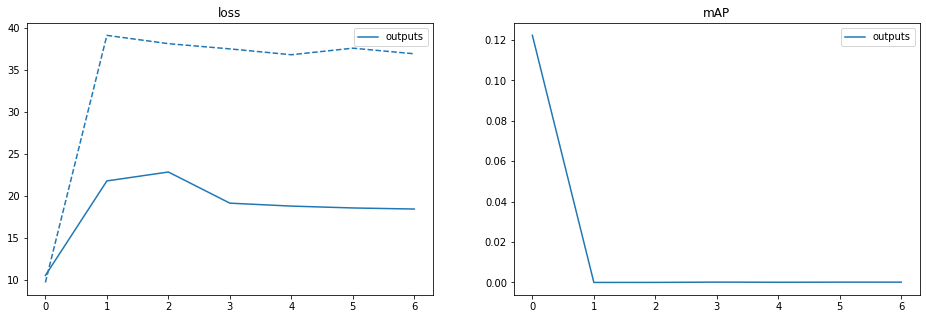

In [6]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

/Users/fcarrabino/Documents/Projects/ML/motr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/Users/fcarrabino/Documents/Projects/ML/motr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/Users/fcarrabino/Documents/Projects/ML/motr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped co

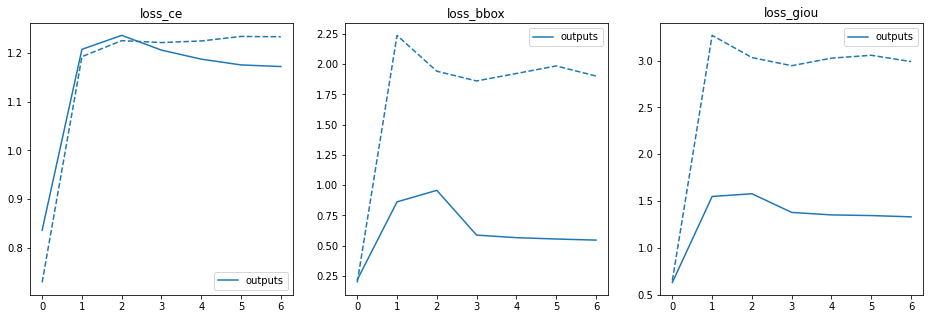

In [7]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

/Users/fcarrabino/Documents/Projects/ML/motr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/Users/fcarrabino/Documents/Projects/ML/motr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


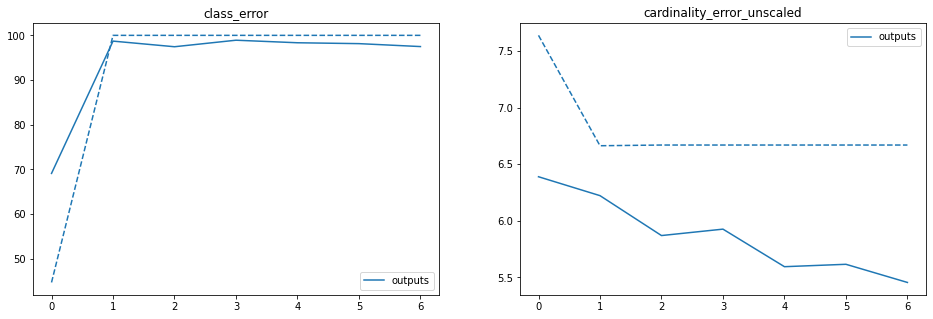

In [8]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   